# Analyzing Customer Behavior and Predicting Churn in the Telecommunication Firm

## Project Outline

### Business Understanding
- General Telecommunication Customer Churn Overview
- Objectives
- Hypothesis
- Analytical Questions


### Data Understanding
- import packages
- Load Data
- EDA (check head, shape, info, describe, duplicates, null values etc)
- Univariate Analysis (Histogram, Box plots, outlier checks, density plots)
- Bivariate Analysis (Pair plots, Correlation Heatmap, Bar charts & Boxplots)
- Answer Analytical questions
- Test hypothesis

### Data Preparation
- Check if dataset is ballanced (Visualisation)
- Split data into x and y, (training and evaluation)
- Encoding y and categorical variables
- Create Transformers (imputation and scaling)

### Modelling & Evaluations
- Chose models to train (distance, gradient descent, tree based +)
- Train on unbalanced dataset
- Train on balanced dataset
- Hyperparemeter tuning
- Model persistance



## BUSINESS UNDERSTANDING

#### General Telecommunication Customer Churn Overview

In the 2022 State of Customer Churn in Telecom survey, it was found that customer loyalty to telecom providers is down 22% post-pandemic, with customer stickiness being impacted more by the customer experience than ever. Further, customers are now more price sensitive, with 58% perceiving telco offerings as expensive.
[Source](https://www.akkio.com/beginners-guide-to-machine-learning?utm_source=Akkio&utm_medium=content-marketing&utm_content=telecom-customer-churn)

Some reasons for churn in telecoms
It emerged that churn in the telecom industry is most often due to high customer effort. Customers canceled their contracts for the following reasons:

- Companies wasted their time (37% waited too long to have their issue resolved)
- Chey had to call more than once (51%)
- Untrained or incompetent agents (37% thought the reps were rude or had a negative approach)
- Inferior self-service options (14%).
[Source](https://techsee.me/resources/reports/2019-telecom-churn-survey/#:~:text=Primary%20reasons%20for%20churn%20in,more%20than%20once%20(51%25))

Machine learning can be a powerful tool for telcos to predict customer churn and keep their customer base. ML is used across many industries, and its application in the telecommunications industry is no different. Machine learning is one way of achieving artificial intelligence.
[Source](https://www.akkio.com/beginners-guide-to-machine-learning?utm_source=Akkio&utm_medium=content-marketing&utm_content=telecom-customer-churn)



#### OBJECTIVES
- In this project, task is to develop a Classification Machine learning model to predict whether a new Telco customer will churn or not churn.
- To understand the dataset and find the lifeline value of each cutomer and determine which factors affect the rate at which customers stop using their network.

#### Datasets
Three datasets from three different sources have been provided for our Machine Learning Modelling
- The first 3000 records of the dataset will be accessed remotely in a database hosted in a Microsoft SQL Server.
- The second part of the data is hosted on a GitHub repository in a file named LP2_Telco-churn-second-2000.csv
- The third part of the dataset with 2000 records named Telco-churn-last-2000.xlsx was found in a OneDrive folder, this dataset has no labels and will be used to test our machine learning model.

##### Data Dictionary


 - **customerID**        - Uniquely Identify each customer
 - **gender**            - whether a customer is a Male or Female
 - **SeniorCitizen**     - whether customer is >60 years or not (Yes or No)
 - **Partner**           - Whether customer have a partner or not (Yes or No)
 - **Dependents**        - Whether customer have a dependents or not (Yes or No)
 - **tenure**            - How many months customer has been on the network
 - **PhoneService**      - Whether the customer is satisfied with the phone services
 - **MultipleLines**     - Whether the customer is satisfied with the multiple lines service
 - **InternetService**   - Whether the customer is satisfied with the internet service
 - **OnlineSecurity**    - whether the customer is satisfied with the online security service
 - **OnlineBackup**      - Whether the customer is satisfied with the onlince backup service
 - **DeviceProtection**  - Whether the customer is satisfied with the device protection service
 - **TechSupport**       - Whether the customer is satisfied with the tech support service
 - **StreamingTV**       - Whether the customer is satisfied with the streaming TV service
 - **StreamingMovies**   - Whether the customer is satisfied with the streaming Movies service
 - **Contract**          - Whether the customer opted for month-to-month, one-year and two-years contract with the Telco
 - **PaperlessBilling**  - Whether the customer is satisfied with the Paperless Billing service
 - **PaymentMethod**     - Whether the customer opted for electronic, mailed check, bank transfer and credit card payment methods
 - **MonthlyCharges**    - Monthly customer charges
 - **TotalCharges**      - Yearly customer charges
 - **Churn**             - Whether a customer will stop using the Telco's network or not (Yes and No)


#### ANALYTICAL QUESTIONS

The following analytical questions will help us gain insight and as well as confirm our hypothesis

1. How long Female and Male spent with Telco before Churning

2. What is the trend between Contract and churn

3. How long does it take each contract type before Churning

3. Which method of payment was prefered among the Senior Citizens and how much in total did both senior and non Senior citizens paid before churning

4. What is the churn trend for gender and dependents as well as their tenure

5. what is the trend between payment methods and gender and how it affect churning

6. What is the trend between tenure and paperlessBilling in relation to churn

7. What is the trend between tenure, Internet Service and senior citizen in relation to churn

8. What is the trend between StreamingMovies and senior citizen in relation to churn

9. How does internetService and OnlineSecurity affect churn

10. What is the trend between Contract and Payment Method in relation to churn


#### HYPOTHESIS

The following hypothesis will be tested

1.  The average number of churn for Female customers is greater than or equal to that of Male customers.

2.  The average amount of TotalCharges for customers that churn is greater than or equal to those that did not churn.

3.  The average number of tenure for customers that churn is less than or equal to those that did not churn

4.  The average number of churn for customers that have Month_to_month contract is greater than or equal to those with 'One year' contract.

5.  The average number of churn for customers that have Yes value for streamingTV is less than or equal to those with No values.

6.  The average number of customers with dependents that will churn is greater than or equal to that of customers with no dependents.

7.  The average number of churn for customers that have **Yes** values for **seniorCitizen** is greater than or equal to those with **No** values.



### Data Understanding

#### - Import all the necessary packages

In [249]:
import pyodbc    
from dotenv import dotenv_values

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

from scipy.stats import ttest_ind

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Loading Datasets

#### Create a connection by accessing your connection string with your defined environment variables

In [250]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [251]:
connection = pyodbc.connect(connection_string)

In [252]:
#Reading data from SQL server
query = "Select * from dbo.LP2_Telco_churn_first_3000"

churn_sql = pd.read_sql(query, connection)

In [253]:
#dataset fromGitHub

churn_git=pd.read_csv('data/telco_churn_git.csv')

In [254]:
churn_sql.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [255]:
churn_git.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


### EDA

In [256]:
churn_sql.shape

(3000, 21)

In [257]:
churn_git.shape

(2043, 21)

In [258]:
churn_sql.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [259]:
churn_git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Observations**
- Both datasets have the same number of columns and the same column names
- The data from SQL have 5 bool, 2 float, 1 int64 and 13 object data types
- The data from GitHub have 1 float, 2 int64, and 18 object
- The column SeniorCitizen is a bool in dataset from SQL and and int64 in the dataset from GitHub, all will be converted to an object type for visualization purposes, they will be encoded later for machine learning



**Investigating and correcting columns with wrong data types**

In [260]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

churn_sql.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.50,False


In [261]:
churn_git.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.5,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.0,1046.5,Yes


**Observations**

- We can observe that all the following columns in the dataset from SQL (telco_churn_sql) **SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling and Churn** contains **True and False** values where as the same columns in dataset from Github (telco_churn_git) apart from **SeniorCitizen** which is made up of categoricals (0 & 1), all others contains **Yes and No**, in order to concatenate both dataframes into one dataset, we will have to assign **True to Yes and False to No**, as well as correct the data types accordingly.

- **tenure** in bothe datasets is int64 type

- **MonthlyCharges** in bothe datasets is float type, which is correct after investigating the values.

- **TotalCharges** is a float in telco_churn_sql dataset where as it is an object type in telco_churn_git, upon investigating the values it is supposed to be a float type, we will therefore rectify this before concatenating the datasets.
- The column **SeniorCitizen** is a bool in dataset from SQL and and int64 in the dataset from GitHub, all will be converted to an object type for visualization purposes, they will be encoded later for machine learning

**Checking if there are duplicates in the datasets**

In [262]:
print(f'The number of duplicate rows in dataset from SQL is: {churn_sql.duplicated().sum()}\nThe number of duplicate rows in dataset from GitHub is: {churn_git.duplicated().sum()}')

The number of duplicate rows in dataset from SQL is: 0
The number of duplicate rows in dataset from GitHub is: 0


**Checking if there are missing values in the datasets**

In [263]:
print(f'Missing values in dataset from SQL: \n{churn_sql.isna().sum()} \n\nMissing values in dataset from GitHub: \n{churn_git.isna().sum()}')

Missing values in dataset from SQL: 
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64 

Missing values in dataset from GitHub: 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyC

In [264]:
churn_sql.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,3000,3000,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,3000,2,Male,1537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,3000,2,False,2525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,3000,2,False,1538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,3000,2,False,2070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,3000.0,NaN,NaN,NaN,32.527333,24.637768,0.0,9.0,29.0,56.0,72.0
PhoneService,3000,2,True,2731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,2731,2,False,1437,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,3000,3,Fiber optic,1343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,2349,2,False,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
# assigning columns with bool type to columns_to_convert
columns_to_convert = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Convert columns with bool type to object (str)
churn_sql[columns_to_convert] = churn_sql[columns_to_convert].astype(str)


In [266]:
#Selecting only object types to apply function on
object_columns = churn_sql.select_dtypes(include=['object'])

#droping columns we will not want to apply function to
object_columns = object_columns.drop(['customerID', 'gender', 'InternetService', 'Contract', 'PaymentMethod'], axis=1)

#Function to replace True with Yes and False with No
for column in object_columns:
    churn_sql[column]=churn_sql[column].astype(str).fillna('No').apply(lambda x: 'Yes' if 'true' in x.lower() else 'No')

In [267]:
churn_sql.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes


In [268]:
#Replacing 1 with Yes and O with No
churn_git['SeniorCitizen']=churn_git['SeniorCitizen'].astype(str).apply(lambda x: 'Yes' if '1' in x.lower() else 'No')

In [269]:
churn_git.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,No,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,No,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,No,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No


In [270]:
#churn_git['TotalCharges']=pd.to_numeric(churn_git['TotalCharges'])

In [271]:
#investigating why getting error trying to change type
churn_git['TotalCharges'].iloc[218]

' '

In [272]:
# Get unique values in 'TotalCharges' column
#unique_values = churn_git['TotalCharges'].unique()

# Convert unique values to a list and print
#print(unique_values.tolist())


In [273]:
#Replacing the ' ' with nothing
churn_git['TotalCharges']=churn_git['TotalCharges'].str.replace(' ','')

In [274]:
churn_git['TotalCharges'].iloc[218]

''

In [275]:
#Changing type from object to float
churn_git['TotalCharges']=pd.to_numeric(churn_git['TotalCharges'])

In [276]:
churn_git.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   object 
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


**Concatenating dataframes**

In [277]:
df_churn= pd.concat([churn_sql, churn_git])

In [278]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [279]:
df_churn.shape

(5043, 21)

In [280]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   object 
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 
 17  

In [281]:
df_churn.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,5043,5043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,5043,2,Male,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,5043,2,No,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,5043,2,No,2585,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,5043,2,No,3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,5043.0,NaN,NaN,NaN,32.576641,24.529807,0.0,9.0,29.0,56.0,72.0
PhoneService,5043,2,Yes,4554,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,5043,3,No,2693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,5043,3,Fiber optic,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,5043,3,No,3158,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [282]:
object_columns = df_churn.select_dtypes(include=['object'])
object_columns = object_columns.drop('customerID', axis=1)

for column in object_columns:
    unique_values=df_churn[column].unique()
    print(f'\n{column}\n{sorted(unique_values)}\n')


gender
['Female', 'Male']


SeniorCitizen
['No', 'Yes']


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


PhoneService
['No', 'Yes']


MultipleLines
['No', 'No phone service', 'Yes']


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'No internet service', 'Yes']


OnlineBackup
['No', 'No internet service', 'Yes']


DeviceProtection
['No', 'No internet service', 'Yes']


TechSupport
['No', 'No internet service', 'Yes']


StreamingTV
['No', 'No internet service', 'Yes']


StreamingMovies
['No', 'No internet service', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaperlessBilling
['No', 'Yes']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Churn
['No', 'Yes']



- We observe that **MultipleLines**, **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** contains unusual unique values

- for **InternetService** it is possible to have **No** if customer have no internet access

these unsual unique values will be investigated further and replace with apprioprate value in neccessary  

In [283]:
multilines_no_ph_ser=df_churn[df_churn['MultipleLines']=='No phone service']
multilines_no_ph_ser.shape

(220, 21)

- Usually if your phone shows a "No Service" message, it means that your device cannot find a signal from your cellular carrier and you cannot make calls, send texts, and other normal functions.
- Since this is similar to not having a line at all, **No phone service** will be replced by **No**

In [284]:
df_churn['MultipleLines']=df_churn['MultipleLines'].str.replace('No phone service', 'No')

In [285]:
Onlsec_no_intnet_ser=df_churn[df_churn['OnlineSecurity']=='No internet service']
Onlsec_no_intnet_ser.shape

(429, 21)

In [286]:
Onlsec_no_intnet_ser.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1648,2164-SOQXL,Female,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,406.05,No
1276,5003-OKNNK,Female,No,Yes,Yes,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.35,335.95,No
632,5567-GZKQY,Male,No,No,No,58,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.30,1131.50,No
634,2320-JRSDE,Female,No,Yes,Yes,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.90,19.90,Yes
1053,0057-QBUQH,Female,No,No,Yes,43,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Electronic check,25.10,1070.15,No
878,8909-BOLNL,Male,No,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,21.20,52.05,No
574,5546-BYZSM,Female,No,No,No,41,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.45,775.60,No
814,0787-LHDYT,Male,No,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.60,330.25,No
1309,2169-RRLFW,Female,No,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.60,1888.25,No
455,9970-QBCDA,Female,No,No,No,6,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.70,129.55,No


- We can observe that for all the rows with value of **No internet service** also have **No** as their corresponding **InternetService** column value
- For **OnlineSecurity**, **OnlineBackup**, **DeviceProtection**, **TechSupport**, **StreamingTV** and **StreamingMovies** No internet service will mean No to all, **No internet service** will then be replaced with **No**

In [287]:
for column in object_columns:
    df_churn[column]=df_churn[column].str.replace('No internet service', 'No')
  

In [288]:
for column in object_columns:
    unique_values=df_churn[column].unique()
    print(f'\n{column}\n{sorted(unique_values)}\n')


gender
['Female', 'Male']


SeniorCitizen
['No', 'Yes']


Partner
['No', 'Yes']


Dependents
['No', 'Yes']


PhoneService
['No', 'Yes']


MultipleLines
['No', 'Yes']


InternetService
['DSL', 'Fiber optic', 'No']


OnlineSecurity
['No', 'Yes']


OnlineBackup
['No', 'Yes']


DeviceProtection
['No', 'Yes']


TechSupport
['No', 'Yes']


StreamingTV
['No', 'Yes']


StreamingMovies
['No', 'Yes']


Contract
['Month-to-month', 'One year', 'Two year']


PaperlessBilling
['No', 'Yes']


PaymentMethod
['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']


Churn
['No', 'Yes']



In [289]:
df_churn.duplicated().sum()

0

In [290]:
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [291]:
#diving deeper to understand the cause of null
df_churn[df_churn['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.549999,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.250000,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.849998,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.750000,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.049999,NaN,No
218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.700000,NaN,No
1670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350000,NaN,No
1754,2775-SEFEE,Male,No,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.900000,NaN,No


- We observe 8 missing values in TotalCharges
- We also observe that for all these customers tenure was 0, which means they have not spent one month with the Telco
- Since TotalCharges is the product of tenure and MonthlyCharges,  then TotalCharges for these rows will be 0, hence we will fillna with 0

In [292]:
df_churn['TotalCharges']=df_churn['TotalCharges'].fillna(0)

In [293]:
df_churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Univariate Analysis 

- (Histogram, Box plots, outlier checks, density plots)

In [294]:
num_cols=df_churn.select_dtypes(include='number')

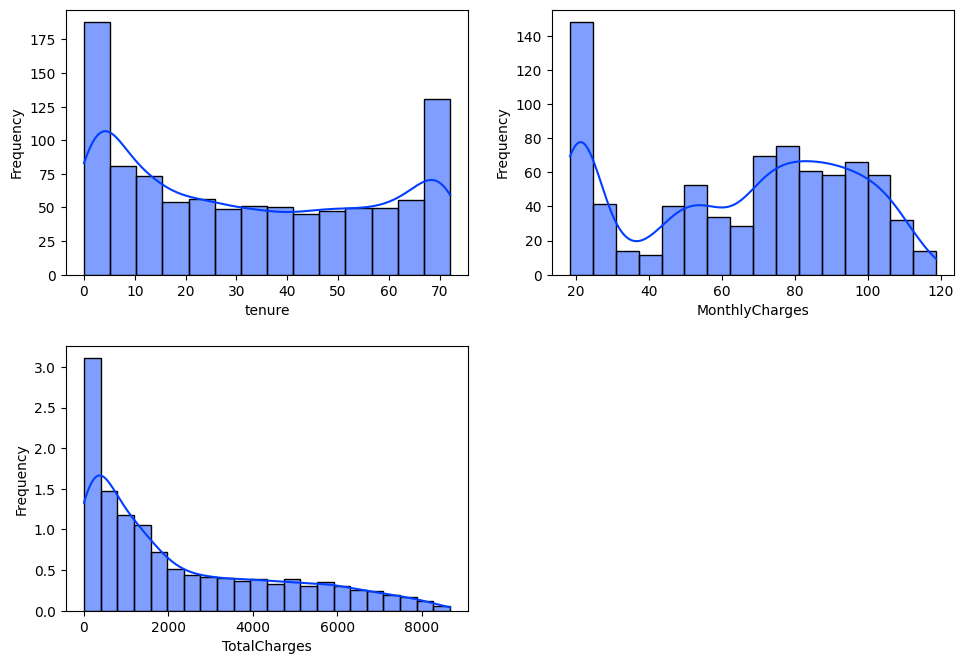

In [295]:
plt.figure(figsize=(10, 7))

for i, variable in enumerate(num_cols):
    plt.subplot(2,2, i + 1)
    sns.histplot(df_churn,x=df_churn[variable],kde=True, stat='frequency')
    plt.tight_layout(pad=2)

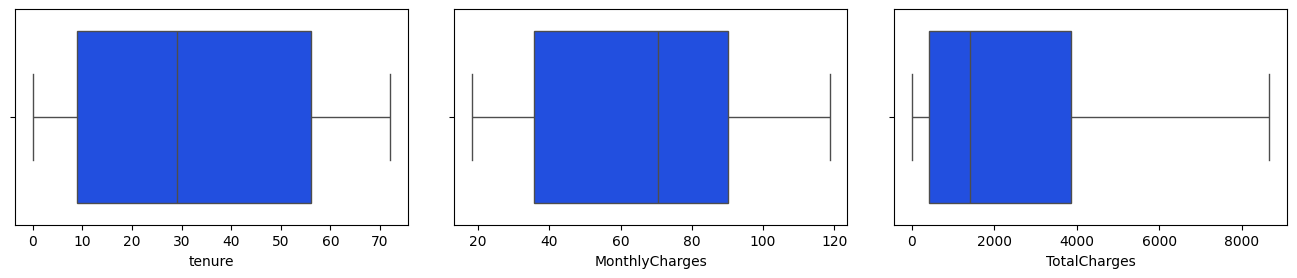

In [296]:
plt.figure(figsize=(18, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(5,4, i + 1)
    sns.boxplot(df_churn, x=df_churn[variable])
    plt.tight_layout(pad=3)

#### Observations

- From the histogram we noticed that after aproximately the first 5 months of tenure, the count of customers reduced drastically and then start reducing slowly untill about the 55th month it started increasing again, from the boxplot there no outliers and the median is around 30 months aproximately.
- For MonthlyCharges we noticed that most customers are prepared to pay approximately 20 beyond which number of customers dropped, rose after charge 40 and dropped, rose again after approximately charge of 75 and then dropped after charge of 100, from the boxplot there are no outliers.
- For TotalCharge most of the customers number of customers started droping after total amount charge of around 400 and continue dropping untill no one was will to pay extra after around an amount of 10,000, from the boxplot there are no outliers, however TotalCharge is highly skewed to the right.

In [297]:
obj_cols=df_churn.select_dtypes(include='object')

In [298]:

obj_cols=obj_cols.drop('customerID', axis=1)



In [299]:
obj_cols.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No


In [300]:
sns.set_palette('bright')

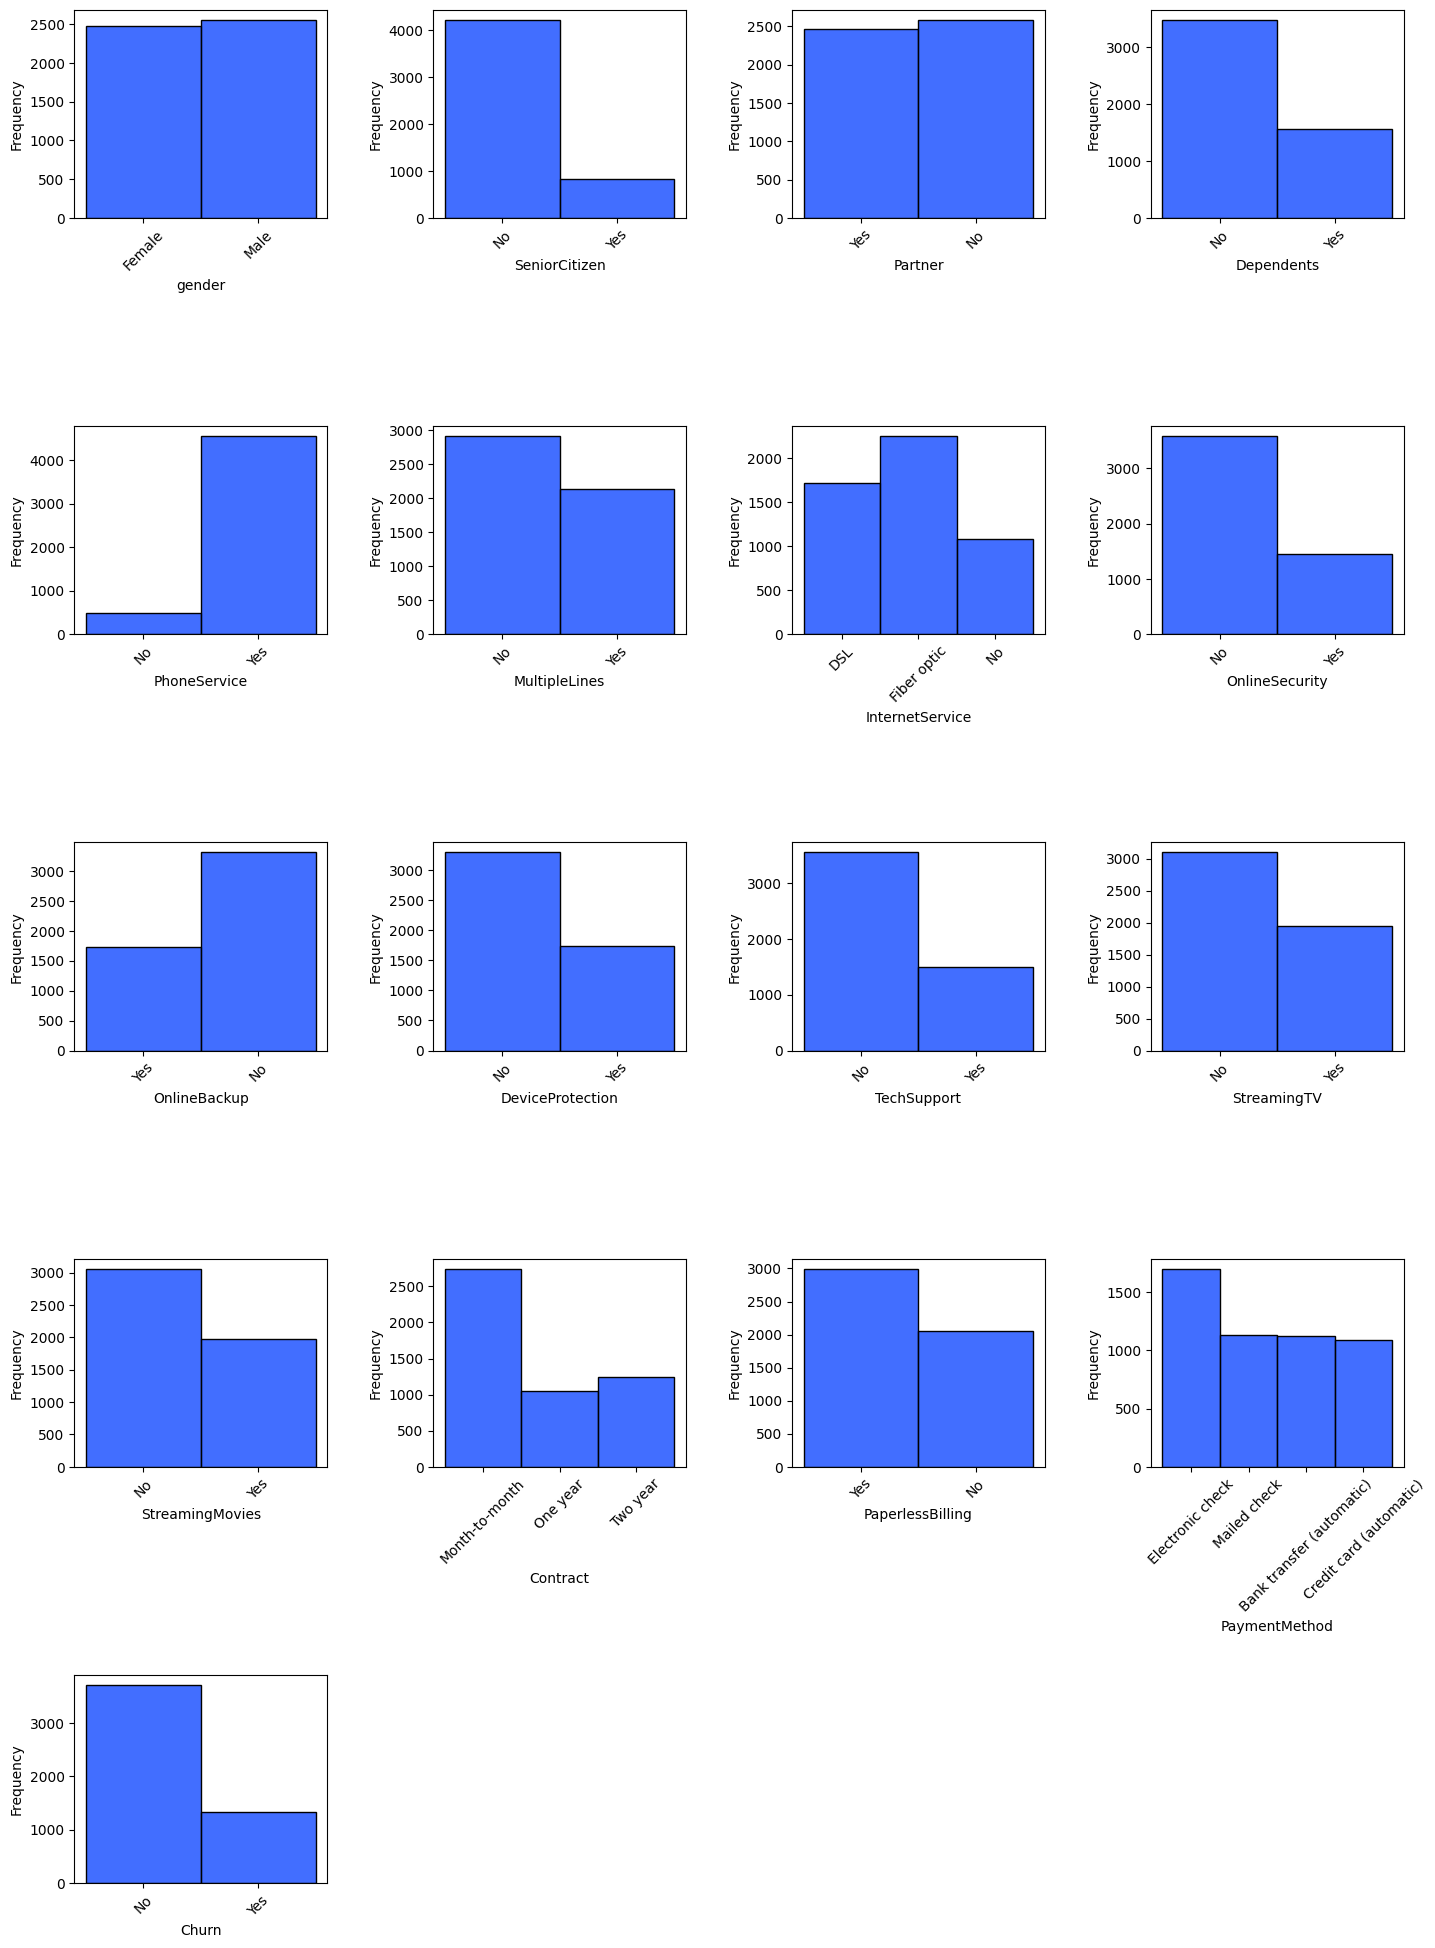

In [301]:
plt.figure(figsize=(15, 20))

for i, variable in enumerate(obj_cols):
    plt.subplot(5,4, i + 1)
    sns.histplot(df_churn,x=df_churn[variable], stat='frequency')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

#### Observations

- Female and Male are evenly distributed, despite Male being slightly higher
- There are approximately 4000 non senior citizens among the telcos' customers compared to around 500 seniors
- Customers with partners and those without are approximately evenly distributed
- Customers without dependents are more than those with dependents
- Custmers with phone service are more than those without phone service
- Customers without multiple lines are slightly higher than those with multiple lines
- For internet service, more customers are on fibre optic followed by DSL and those with no internet service
- Customers with no online security were more than those with online security
- Customers with no online backup were more than those with online backup
- Customers with no device protection were more than those with device protection
- Customers with no Tech support were more than those with tech support
- Customers with no streaming TV were more than those with streaming TV
- Customers with no streaming Movies were more than those with streaming Movies
- Month to Month contract was more frequent followed by, two year contract and one year contract
- Customers that opted for paperless billing were more than those that did not
- Electronic check was more frequent of the payment methods, whiles the other methods remains evenly distributed
- Customers that did not churn are more than those that churned.

### Bi & Multivariate Analysis

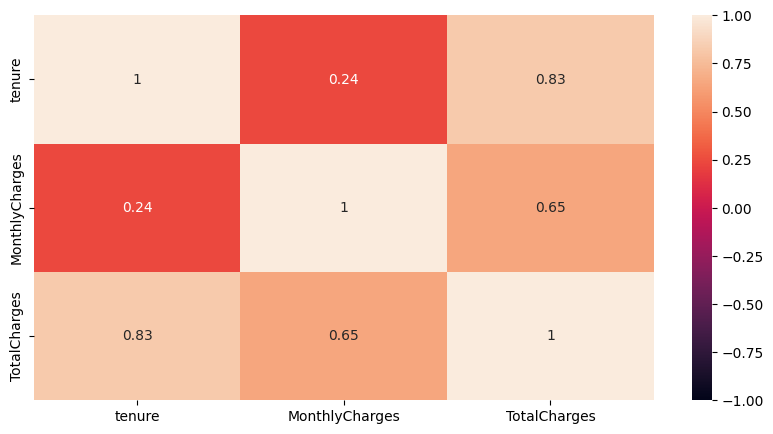

In [302]:
plt.figure(figsize=(10, 5))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

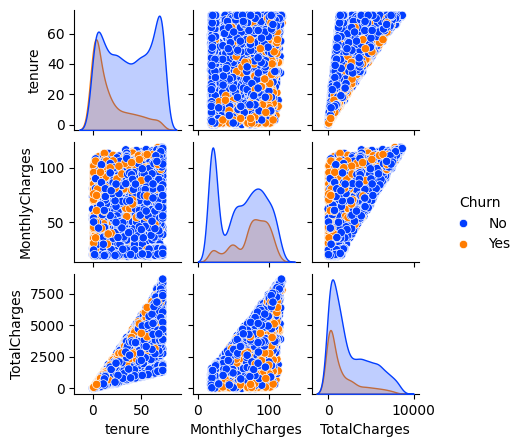

In [303]:

sns.pairplot(df_churn, hue='Churn', height=1.5)
plt.show()

- TotalCharges and tenure are highly positively correlated
- Totalcharges and monthlycharges are also higly correlated

In [304]:
col_no_id=df_churn.drop(columns='customerID')

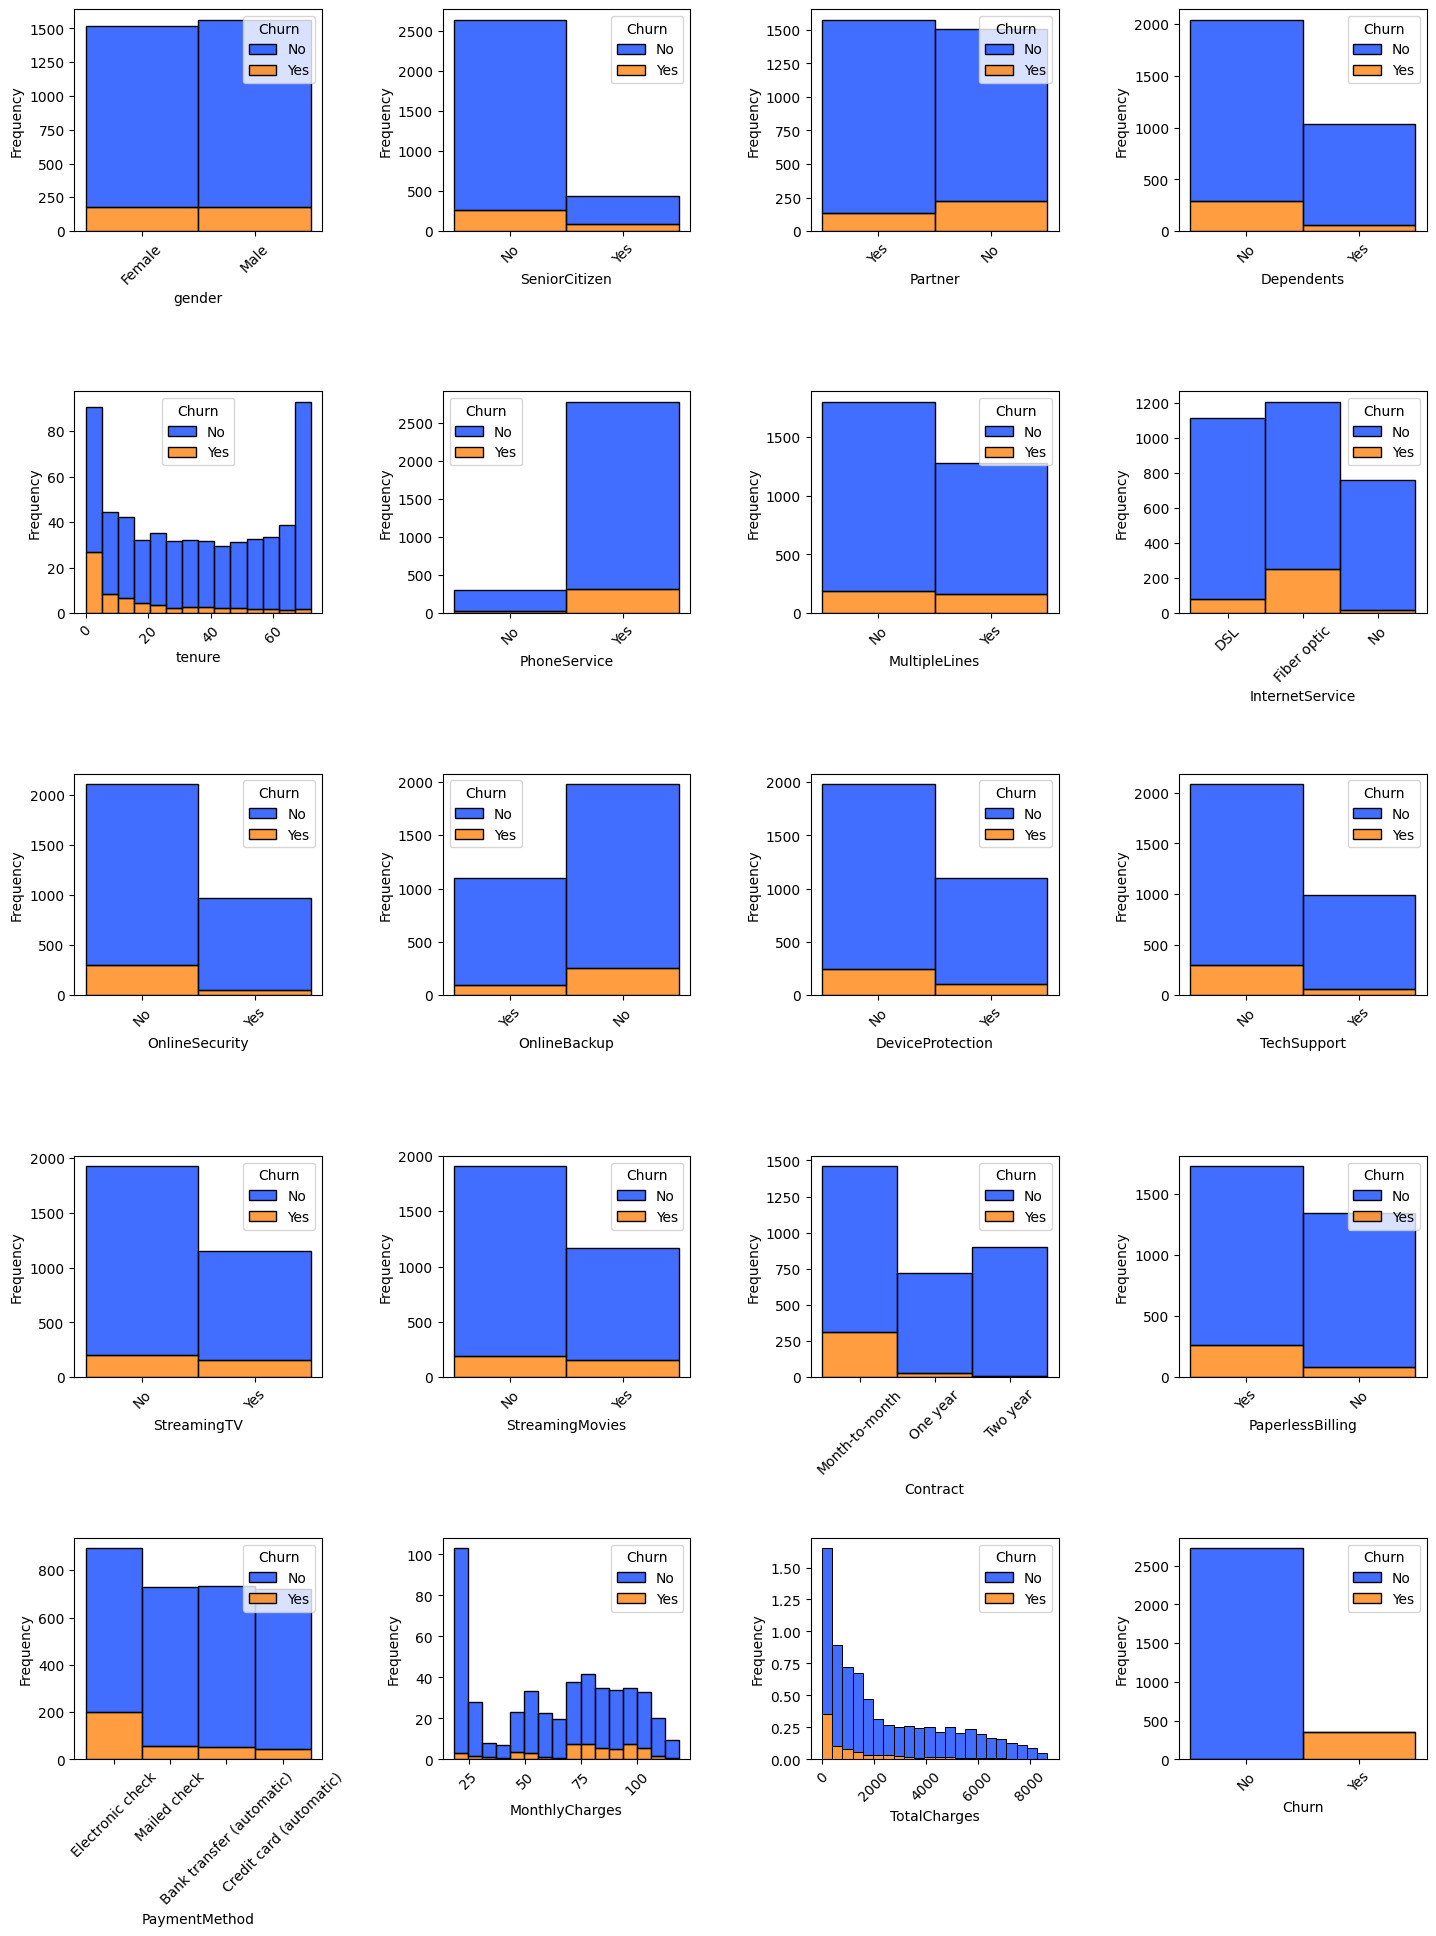

In [305]:
custom_palette = sns.color_palette("Paired", 2)


plt.figure(figsize=(15, 20))

for i, variable in enumerate(col_no_id):
    plt.subplot(5,4, i + 1)
    sns.histplot(df_churn,x=df_churn[variable], stat='frequency', hue='Churn', multiple='stack')
    plt.tight_layout(pad=3)
    plt.xticks(rotation=45)

#### Observations



## Answering Analytical Questions

### Question 1

#### What is the relationship between gender and Churn

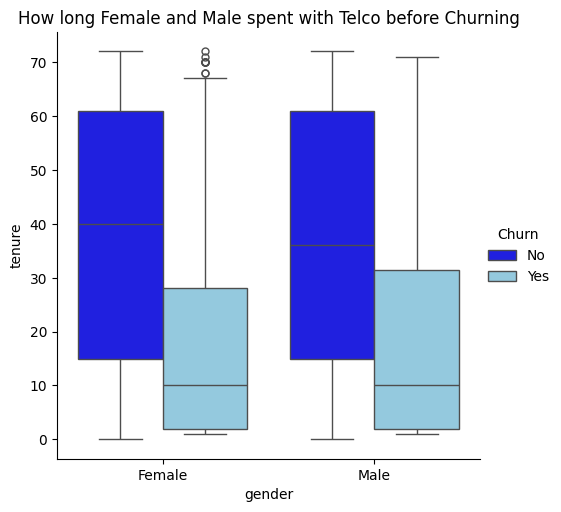

In [306]:

sns.catplot(df_churn, x='gender', y= 'tenure', hue='Churn', kind='box', palette=['blue', 'skyblue'] )
plt.title('How long Female and Male spent with Telco before Churning')
plt.show()

**Observations**
- The median tenure value for both Females and Males who did churn are almost the same
- Female and Males seems to have similar distribution in relation to those that churn or not
- The median tenure value for both gender who did not churn is higher than those that churn

### Question 2

#### How long does it take each contract type before Churning

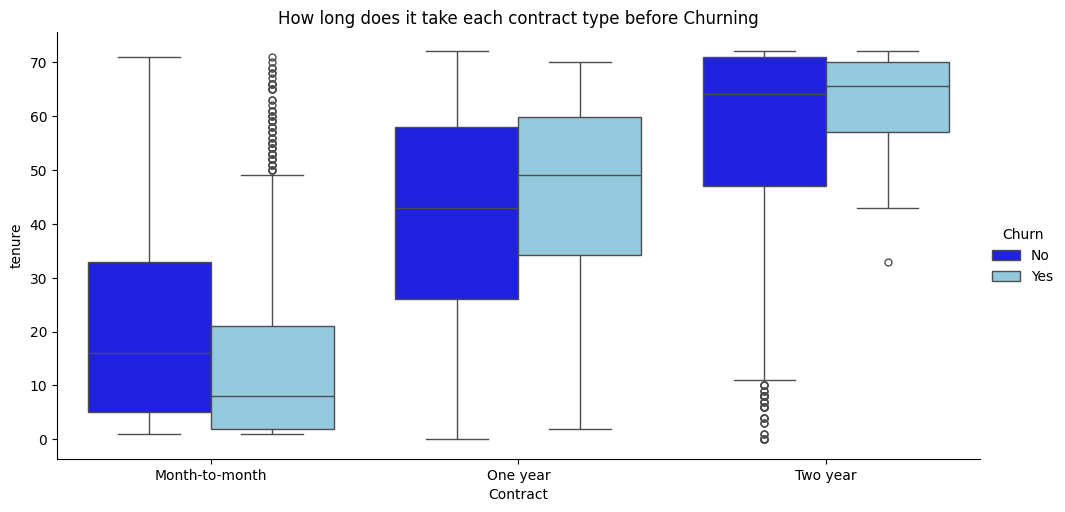

In [307]:
sns.catplot(df_churn, x='Contract', y= 'tenure', hue='Churn', kind='box', aspect=2, palette=['blue', 'skyblue'])
plt.title('How long does it take each contract type before Churning')
plt.show()

**Observations**

- We observed that customers with long term contracts tend to have longer tenure
- There outliers in the Month-to-Month and two year contract 
- The median tenure value for those on month-to-month contract that did not churn is higher than those that churned
- The median tenure value for thoes on one year and two years contract that did not churn is lower than those that did churned

### Question 3

#### Which metod of payment was prefered among the Senior Citizens and how much in total did both senior and non Senior citizens paid before churning

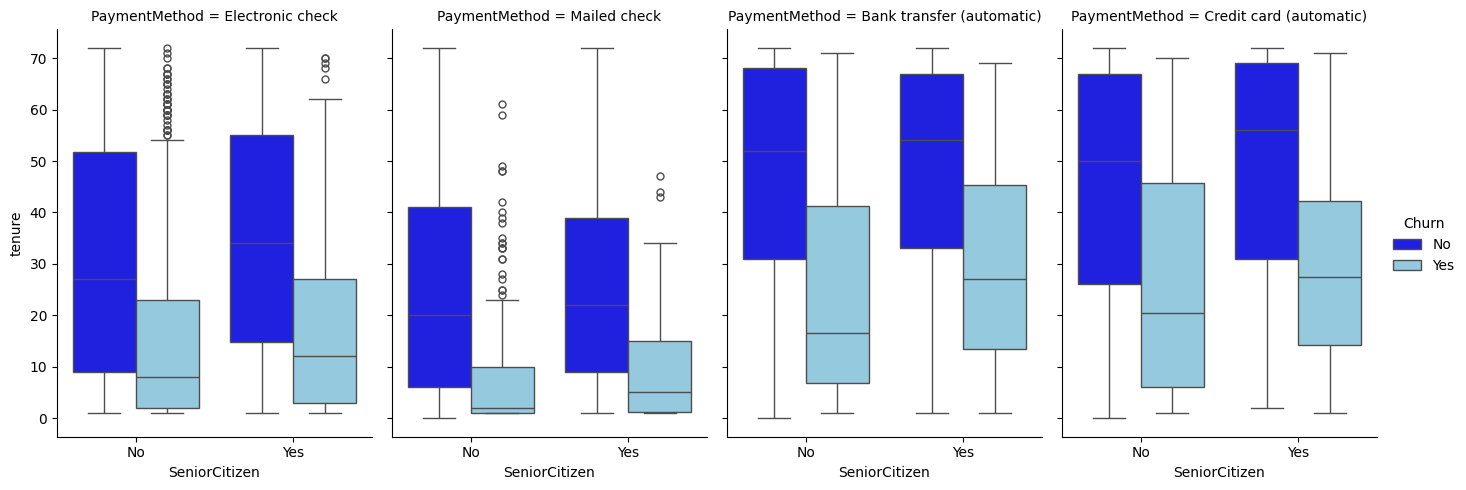

In [308]:
sns.catplot(
    data=df_churn, x='SeniorCitizen', y='tenure', hue='Churn',
    kind='box', col='PaymentMethod', aspect=.7, palette=['blue', 'skyblue']
)

**Observations**
- Across all the payment methods, the median tenure for both senior citizens and non senior cirizens that did not churn are higher than those that churned
- For both Senior Citizens and non senior citizens using Electronic check and Mailed check that churned have a lower median tenure than those using bank transfer and credit cards

### Question 4

#### What is the churn trend for gender and dependents as well as their tenure

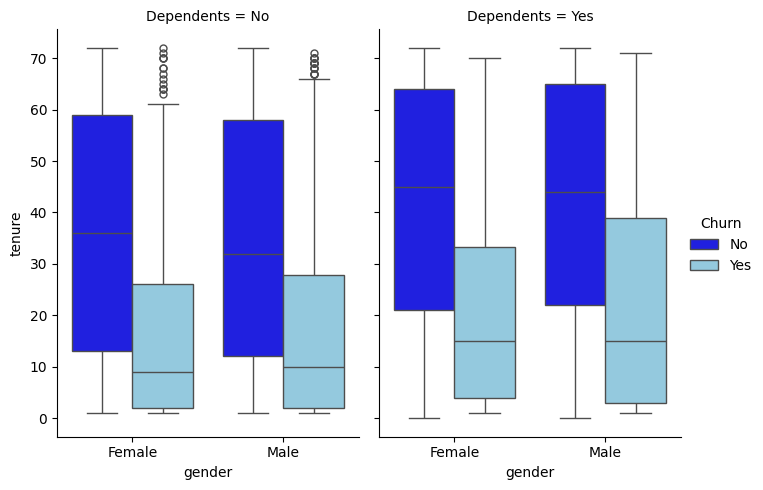

In [309]:
sns.catplot(
    data=df_churn, x='gender', y='tenure', hue='Churn',
    kind='box', col='Dependents', aspect=.7, palette=['blue', 'skyblue']
)

**Observations**
- For both Females and Males the median tenure for those that did not churn are higher than those that churned, whether they had dependents or not
- For both Females and Males that did not have dependents that churned have a lower median tenure than those that had dependents

### Question 5

#### what is the trend between payment methods and gender and how it affect churning

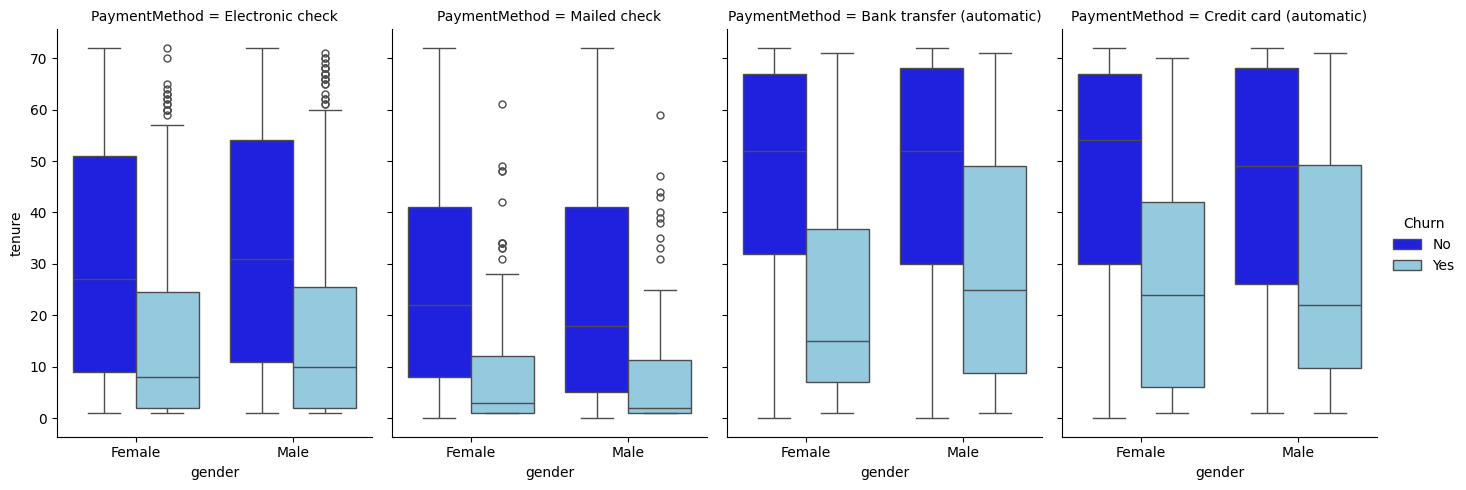

In [310]:
sns.catplot(
    data=df_churn, x='gender', y='tenure', hue='Churn',
    kind='box', col='PaymentMethod', aspect=.7, palette=['blue', 'skyblue']
)

**Observations**
- Across all the payment methods, the median tenure for both Females and Males that did not churn are higher than those that churned
- For both Females and Males using Electronic check and Mailed check that churned have a lower median tenure than those using bank transfer and credit cards

### Question 6

#### What is the trend between tenure, seniorcitizen and paperlessBilling in relation to churn

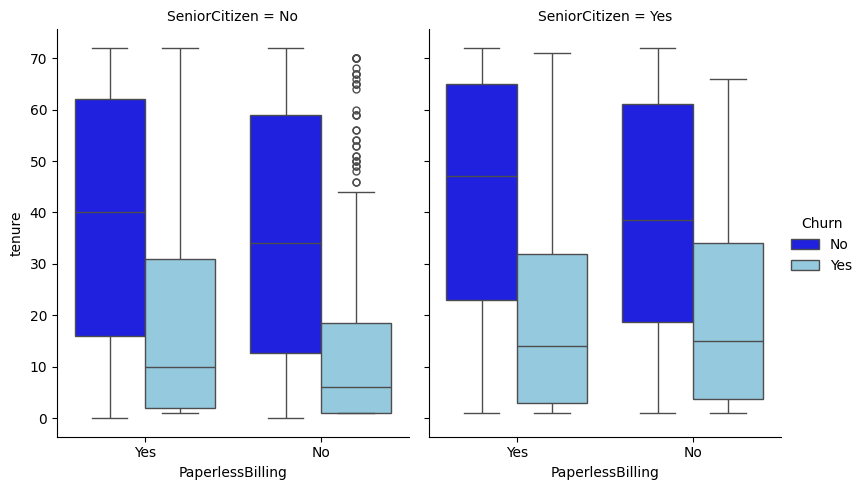

In [311]:
sns.catplot(
    data=df_churn, x='PaperlessBilling', y='tenure', hue='Churn',
    kind='box', col='SeniorCitizen', aspect=0.8, palette=['blue', 'skyblue']
)

### Question 7

#### What is the trend between tenure, Internet Service and senior citizen in relation to churn

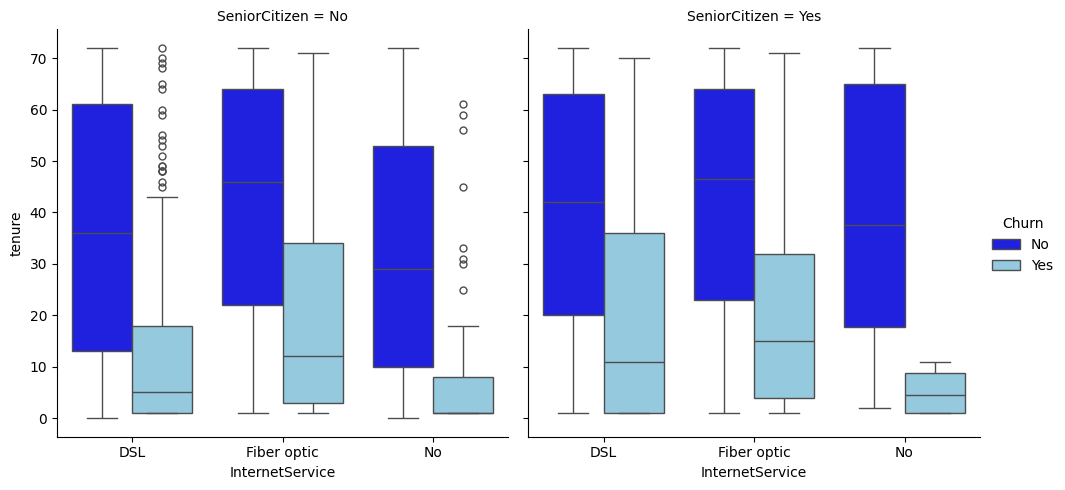

In [312]:
sns.catplot(
    data=df_churn, x='InternetService', y='tenure', hue='Churn',
    kind='box', col='SeniorCitizen', aspect=1, palette=['blue', 'skyblue']
)

### Question 8

#### What is the trend between StreamingMovies and senior citizen in relation to churn

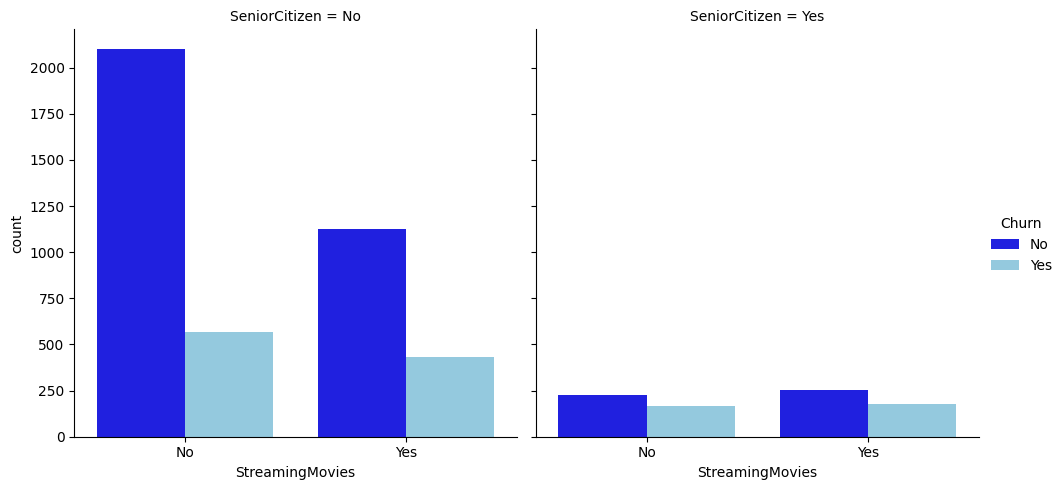

In [313]:
sns.catplot(
    data=df_churn, x='StreamingMovies', hue='Churn',
    kind='count', col='SeniorCitizen', aspect=1, palette=['blue', 'skyblue']
)

### Question 9

#### How does internetService and OnlineSecurity affect churn

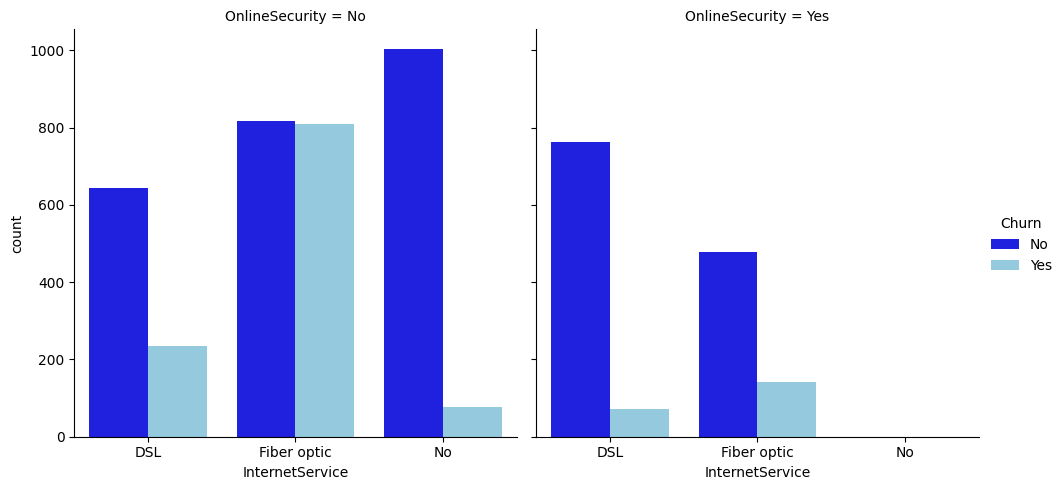

In [314]:
sns.catplot(
    data=df_churn, x='InternetService', hue='Churn',
    kind='count', col='OnlineSecurity', aspect=1, palette=['blue', 'skyblue']
)

### Question 10

#### What is the trend between Contract, Payment Method and gender in relation to churn

In [315]:
import numpy as np

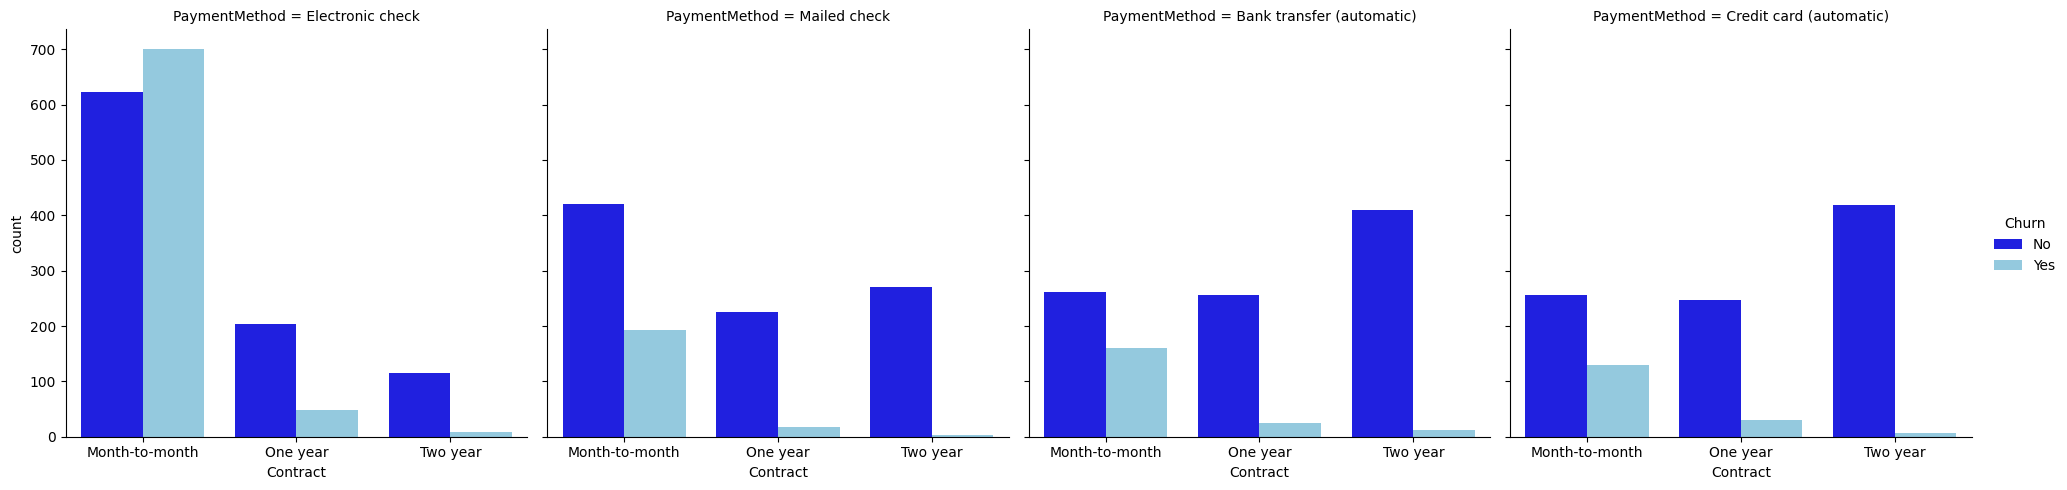

In [316]:
sns.catplot(
    data=df_churn, x='Contract', hue='Churn',
    kind='count', col='PaymentMethod', aspect=1, col_wrap=4, palette=['blue', 'skyblue']
)

plt.show()

### HYPOTHESIS

- A significance level (α) of 5% will used to perform all the hypothesis testing


### 1

Let  μ1,μ2 be the mean number of Female and Male customers respectively

The null hypothesis : The average number of Females that churn is greater than or equal to that of Males

Ho:μ1>=μ2
 
The alternate hypothesis :The average number of Females that churn is less than that of Males 

Ha:μ1<μ2

In [317]:
#printing means and standard deviations of number of Females and Males

print('The mean number of Females that churned is ' + str(round(df_churn[(df_churn['gender']=='Female')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The mean number of Males that churned is ' + str(round(df_churn[(df_churn['gender']=='Male')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The standard deviation of Females that churned is ' + str(round(df_churn[(df_churn['gender']=='Female')& (df_churn['Churn']=='Yes')].count().std(), 2)))
print('The standard deviation of Males that churned is ' + str(round(df_churn[(df_churn['gender']=='Male')& (df_churn['Churn']=='Yes')].count().std(), 2)))

The mean number of Females that churned is 661.0
The mean number of Males that churned is 675.0
The standard deviation of Females that churned is 0.0
The standard deviation of Males that churned is 0.0


In [318]:
#Number of females that churned
fem_churned=df_churn[(df_churn['gender']=='Female')& (df_churn['Churn']=='Yes')].count()


#Number of males that churned
male_churned=df_churn[(df_churn['gender']=='Male')& (df_churn['Churn']=='Yes')].count()

In [319]:
# Calculating the p-value

test_stat, p_value=ttest_ind(fem_churned,male_churned, equal_var=True, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')


The p-value is:  0.0
The Test statistics is: -inf


In [320]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of Females that churn is less than that of Males 

 ### 2

Let  μ1,μ2 be the mean amount of TotalCharges for customers that churned and those that did not churned respectively

The null hypothesis : The average amount of TotalCharges for customers that churn is greater than or equal to those that did not churn

Ho:μ1>=μ2
 
The alternate hypothesis : The average amount of TotalCharges for customers that churn is less than to those that did not churn

Ha:μ1<μ2
 
 

In [321]:
#printing means and standard deviations of number of tenure of customers that churned and those that did not churned

print('The mean TotalCharges of customers that churned is ' + str(round(df_churn[df_churn['Churn']=='Yes']['TotalCharges'].mean(), 2)))
print('The mean TotalCharges of customers that did not churned is ' + str(round(df_churn[df_churn['Churn']=='No']['TotalCharges'].mean(), 2)))
print('The standard deviation of TotalCharges of customers that churned is ' + str(round(df_churn[df_churn['Churn']=='Yes']['TotalCharges'].std(), 2)))
print('The standard deviation of TotalCharges of customers that did not churned is  ' + str(round(df_churn[df_churn['Churn']=='No']['TotalCharges'].std(), 2)))

The mean TotalCharges of customers that churned is 1566.52
The mean TotalCharges of customers that did not churned is 2562.18
The standard deviation of TotalCharges of customers that churned is 1918.76
The standard deviation of TotalCharges of customers that did not churned is  2327.81


In [322]:
#Total charges for customers that churned
totcharge_churn = df_churn[df_churn['Churn']=='Yes']['TotalCharges']

#Total charges for customers that did not churned
totcharge_no_churn = df_churn[df_churn['Churn']=='No']['TotalCharges']

In [323]:
# Calculating the p-value

test_stat, p_value=ttest_ind(totcharge_churn,totcharge_no_churn, equal_var=True, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')

The p-value is:  4.327662550473521e-44
The Test statistics is: -14.01194868633248


In [324]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 4.327662550473521e-44 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0000) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that The average amount of TotalCharges for customers that churn is less than to those that did not churn


### 3

Let  μ1,μ2 be the mean number of tenure for customers that churend and those that did not churn respectively

The null hypothesis : The average number of tenure for customers that churn is less than or equal to those that did not churn

Ho:μ1<=μ2
 
The alternate hypothesis :The average number of tenure for customers that churn is greater than those that did not churn 

Ha:μ1>μ2


In [325]:
#printing means and standard deviations of number of tenure of customers that churned and those that did not churned

print('The mean tenure of customers that churned is ' + str(round(df_churn[df_churn['Churn']=='Yes']['tenure'].mean(), 2)))
print('The mean tenure of customers that did not churned is ' + str(round(df_churn[df_churn['Churn']=='No']['tenure'].mean(), 2)))
print('The standard deviation of tenure of customers that churned is ' + str(round(df_churn[df_churn['Churn']=='Yes']['tenure'].std(), 2)))
print('The standard deviation of tenure of customers that did not churned is  ' + str(round(df_churn[df_churn['Churn']=='No']['tenure'].std(), 2)))

The mean tenure of customers that churned is 18.24
The mean tenure of customers that did not churned is 37.74
The standard deviation of tenure of customers that churned is 19.7
The standard deviation of tenure of customers that did not churned is  24.04


In [326]:
#Tenure for customers that churned
tenure_churn = df_churn[df_churn['Churn']=='Yes']['tenure']

#Tenure for customers that did not churned
tenure_no_churn = df_churn[df_churn['Churn']=='No']['tenure']

In [327]:
# Calculating the p-value

test_stat, p_value=ttest_ind(tenure_churn,tenure_no_churn, equal_var=True, alternative='greater')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')

The p-value is:  1.0
The Test statistics is: -26.602280735046378


In [328]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.0 is greater than the level of significance, we fail to reject the null hypothesis.


**Remarks**

- Since the pvalue (~1.0) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of tenure for customers that churn is less than or equal to those that did not churn

### 4

Let  μ1,μ2 be the mean number of Month-to-Month and One-year contract customers respectively

The null hypothesis : The average number of churn for customers that have Month_to_Month contract is greater than or equal to those with 'One year' contract

Ho:μ1>=μ2
 
The alternate hypothesis : The average number of churn for customers that have Month_to_Month contract is less than to those with 'One year' contract 

Ha:μ1<μ2


In [329]:
#printing means and standard deviations of number of Month-to-Month and One-year Contract customers

print('The mean number of Month-to-Month contract customers that churned is ' + str(round(df_churn[(df_churn['Contract']=='Month-to-month')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The mean number of One year contract customer that churned is ' + str(round(df_churn[(df_churn['Contract']=='One year')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The standard deviation of Month-to-Month contract customers that churned is ' + str(round(df_churn[(df_churn['Contract']=='Month-to-month')& (df_churn['Churn']=='Yes')].count().std(), 2)))
print('The standard deviation of One year contract customer that churned is ' + str(round(df_churn[(df_churn['Contract']=='One year')& (df_churn['Churn']=='Yes')].count().std(), 2)))

The mean number of Month-to-Month contract customers that churned is 1184.0
The mean number of One year contract customer that churned is 122.0
The standard deviation of Month-to-Month contract customers that churned is 0.0
The standard deviation of One year contract customer that churned is 0.0


In [330]:
#Mont-to-month contract customers that churned
month_con_churned = df_churn[(df_churn['Contract']=='Month-to-month')& (df_churn['Churn']=='Yes')].count()

#One year contract customers that churned
one_yr_con_churned = df_churn[(df_churn['Contract']=='One year')& (df_churn['Churn']=='Yes')].count()

In [331]:
# Calculating the p-value

test_stat, p_value=ttest_ind(month_con_churned, one_yr_con_churned, equal_var=True, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')

The p-value is:  1.0
The Test statistics is: inf


In [332]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.0 is greater than the level of significance, we fail to reject the null hypothesis.


**Remarks**

- Since the pvalue (~1.0) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of churn for customers that have Month_to_Month contract is greater than or equal to those with 'One year' contract

### 5

Let  μ1,μ2 be the mean number of customers with Yes for streamingTV that churend and those with No that churn respectively

The null hypothesis :  The average number of churn for customers that have Yes value for streamingTV is less than or equal to those with No values

Ho:μ1<=μ2
 
The alternate hypothesis :  The average number of churn for customers that have Yes value for streamingTV is greater than those with No values 

Ha:μ1>μ2

In [333]:
#printing means and standard deviations of number of customers with streamingTV and those without

print('The mean number of customers with streamingTV that churned is ' + str(round(df_churn[(df_churn['StreamingTV']=='Yes')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The mean number of customer without streamingTV that churned is ' + str(round(df_churn[(df_churn['StreamingTV']=='No')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The standard deviation of customers with streamingTV that churned is ' + str(round(df_churn[(df_churn['StreamingTV']=='Yes')& (df_churn['Churn']=='Yes')].count().std(), 2)))
print('The standard deviation of customer without streamingTV that churned is ' + str(round(df_churn[(df_churn['StreamingTV']=='No')& (df_churn['Churn']=='Yes')].count().std(), 2)))

The mean number of customers with streamingTV that churned is 585.0
The mean number of customer without streamingTV that churned is 751.0
The standard deviation of customers with streamingTV that churned is 0.0
The standard deviation of customer without streamingTV that churned is 0.0


In [334]:
#Mont-to-month contract customers that churned
yes_streamtv_churned = df_churn[(df_churn['StreamingTV']=='Yes')& (df_churn['Churn']=='Yes')].count()

#One year contract customers that churned
no_streamtv_churned = df_churn[(df_churn['StreamingTV']=='No')& (df_churn['Churn']=='Yes')].count()

In [335]:
# Calculating the p-value

test_stat, p_value=ttest_ind(yes_streamtv_churned, no_streamtv_churned, equal_var=True, alternative='greater')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')

The p-value is:  1.0
The Test statistics is: -inf


In [336]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 1.0 is greater than the level of significance, we fail to reject the null hypothesis.


**Remarks**

- Since the pvalue (~1.0) is greater than the level of significance(α=0.05), we fail to reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of churn for customers that have Yes value for streamingTV is less than or equal to those with No values

### 6

Let  μ1,μ2 be the mean number of customers with dependents that churend and those with no dependents that churn respectively

The null hypothesis :  The average number of customers with dependents that churned is greater than or equal to that of customers with no dependents

Ho:μ1>=μ2
 
The alternate hypothesis :  The average number of customers with dependents that churned is less than that of customers with no dependents 

Ha:μ1<μ2

In [337]:
#printing means and standard deviations of number of customers with dependents and those without that churned

print('The mean number of customers with dependents that churned is ' + str(round(df_churn[(df_churn['Dependents']=='Yes')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The mean number of customer without dependents  that churned is ' + str(round(df_churn[(df_churn['Dependents']=='No')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The standard deviation of customers with dependents  that churned is ' + str(round(df_churn[(df_churn['Dependents']=='Yes')& (df_churn['Churn']=='Yes')].count().std(), 2)))
print('The standard deviation of customer without dependents  that churned is ' + str(round(df_churn[(df_churn['Dependents']=='No')& (df_churn['Churn']=='Yes')].count().std(), 2)))

The mean number of customers with dependents that churned is 237.0
The mean number of customer without dependents  that churned is 1099.0
The standard deviation of customers with dependents  that churned is 0.0
The standard deviation of customer without dependents  that churned is 0.0


In [338]:
#number of customers with dependents that churned
yes_depe_churn = df_churn[(df_churn['Dependents']=='Yes')& (df_churn['Churn']=='Yes')].count()

#number of customers with no dependents that churned
no_depe_churn = df_churn[(df_churn['Dependents']=='No')& (df_churn['Churn']=='Yes')].count()

In [339]:
# Calculating the p-value

test_stat, p_value=ttest_ind(yes_depe_churn, no_depe_churn, equal_var=True, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')

The p-value is:  0.0
The Test statistics is: -inf


In [340]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of customers with dependents that churned is less than that of customers with no dependents

### 7

Let  μ1,μ2 be the mean number of customers with Yes for seniorCitizen that churend and those with No that churn respectively

The null hypothesis :  The average number of churn for customers that have **Yes** values for **seniorCitizen** is greater than or equal to those with **No** values

Ho:μ1>=μ2
 
The alternate hypothesis :  The average number of churn for customers that have **Yes** values for **seniorCitizen** is less than those with **No** values 

Ha:μ1<μ2

In [341]:
#printing means and standard deviations of number of customers that are seniorcitizens and those that are not

print('The mean number of SeniorCitizens that churned is ' + str(round(df_churn[(df_churn['SeniorCitizen']=='Yes')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The mean number of non SeniorCitizens that churned is ' + str(round(df_churn[(df_churn['SeniorCitizen']=='No')& (df_churn['Churn']=='Yes')].count().mean(), 2)))
print('The standard deviation of SeniorCitizens that churned is ' + str(round(df_churn[(df_churn['SeniorCitizen']=='Yes')& (df_churn['Churn']=='Yes')].count().std(), 2)))
print('The standard deviation of non SeniorCitizens that churned is ' + str(round(df_churn[(df_churn['SeniorCitizen']=='No')& (df_churn['Churn']=='Yes')].count().std(), 2)))

The mean number of SeniorCitizens that churned is 340.0
The mean number of non SeniorCitizens that churned is 996.0
The standard deviation of SeniorCitizens that churned is 0.0
The standard deviation of non SeniorCitizens that churned is 0.0


In [342]:
#number of customers with dependents that churned
yes_senior_churn = df_churn[(df_churn['SeniorCitizen']=='Yes')& (df_churn['Churn']=='Yes')].count()

#number of customers with no dependents that churned
no_senior_churn = df_churn[(df_churn['SeniorCitizen']=='No')& (df_churn['Churn']=='Yes')].count()

In [343]:
# Calculating the p-value

test_stat, p_value=ttest_ind(yes_senior_churn , no_senior_churn, equal_var=True, alternative='less')
print(f'The p-value is:  {p_value}\nThe Test statistics is: {test_stat}')

The p-value is:  0.0
The Test statistics is: -inf


In [344]:
# Comparing the p-value with α
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0 is less than the level of significance, we reject the null hypothesis.


**Remarks**

- Since the pvalue (~0.0) is less than the level of significance(α=0.05), we reject the null hypothesis. Hence, we have enough statistical evidence to say that the average number of churn for customers that have Yes values for seniorCitizen is less than those with No values

### Data Preparation
- Check if dataset is ballanced (Visualisation)
- Split data into x and y, (training and evaluation)
- Encoding y and categorical variables
- Create Transformers (imputation and scaling)

#### Checking if data is ballanced

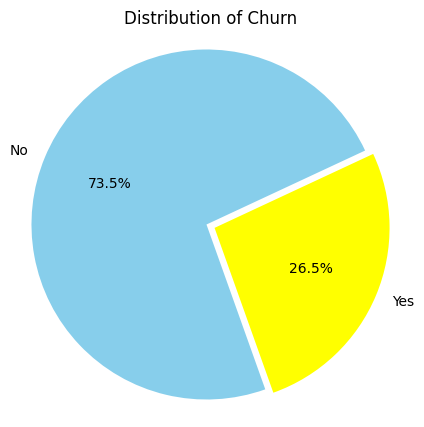

In [345]:
churn_counts = df_churn['Churn'].value_counts()
explode = [0.05 if label == 'Yes' else 0 for label in churn_counts.index]

plt.figure(figsize=(5, 5))  
plt.pie(churn_counts, labels=churn_counts.index, explode=explode, autopct='%1.1f%%', startangle=25, colors=['skyblue', 'yellow'])
plt.axis('equal')
plt.title('Distribution of Churn')
plt.show()

- There is imbalance in the class labels, 73.5% against 26.5%
- We will use oversampling to treat imbalance.
- We will model the imbalance and balanced and compare  

In [346]:
df_churn=df_churn.drop(columns=['customerID'])

In [376]:
from sklearn.preprocessing import OneHotEncoder

obj_columns = df_churn.select_dtypes(include=['object'])

for column in obj_columns.columns:
    ohe=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    df_churn[column]=ohe.fit_transform(df_churn[[column]])

In [377]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1.0,1.0,0.0,1.0,1,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,29.850000,29.850000,1.0
1,0.0,1.0,1.0,1.0,34,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,56.950001,1889.500000,1.0
2,0.0,1.0,1.0,1.0,2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,53.849998,108.150002,0.0
3,0.0,1.0,1.0,1.0,45,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,42.299999,1840.750000,1.0
4,1.0,1.0,1.0,1.0,2,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,70.699997,151.649994,0.0


#### Splitting data into x and y, (training and evaluation)

In [378]:
X = df_churn.drop(columns=['Churn']) 

y = df_churn['Churn']  

In [380]:
# Splitting the data into training and evaluation sets for both features and labels
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.25, random_state=5)


In [381]:
print(f'X_train shape: {X_train.shape}\nX_eval shape: {X_eval.shape}\ny_train shape: {y_train.shape}\ny_eval shape: {y_eval.shape}')

X_train shape: (3782, 19)
X_eval shape: (1261, 19)
y_train shape: (3782,)
y_eval shape: (1261,)


In [382]:
# Assuming X_train and y_train are your features and labels for training data
ros = RandomOverSampler(random_state=5)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


In [383]:
print(f'X_resampled shape: {X_resampled.shape}\ny_resampled shape: {y_resampled.shape}')

X_resampled shape: (5542, 19)
y_resampled shape: (5542,)


In [384]:
# Splitting the data into training and evaluation sets for both features and labels
X_resampled_train, X_resampled_eval, y_resampled_train, y_resampled_eval = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=5)

In [385]:
print(f'X_resampled_train shape: {X_resampled_train.shape}\nX_resampled_eval shape: {X_resampled_eval.shape}\ny_resampled_train shape: {y_resampled_train.shape}\ny_resampled_eval shape: {y_resampled_eval.shape}')

X_resampled_train shape: (4156, 19)
X_resampled_eval shape: (1386, 19)
y_resampled_train shape: (4156,)
y_resampled_eval shape: (1386,)


In [386]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, mean_squared_error


In [387]:
models={}

models['Logistic Regression']=LogisticRegression(random_state=5)
models['Support Vector Machine']=LinearSVC(random_state=5)
models['Decision Tree']=DecisionTreeClassifier(random_state=5)
models['Random Forest']=RandomForestClassifier(random_state=5)
models['Naive Bayes']=GaussianNB()
models['K-Nearest Neighbors']=KNeighborsClassifier()
models['Gradient Boosting']=GradientBoostingClassifier(random_state=5)
models['XGBoost']=XGBClassifier(random_state=5)

In [388]:
for Key in models.keys():
    models[Key].fit(X_train, y_train)
    y_pred = models[Key].predict(X_eval)
    print(Key)
    print('Accuracy Score: ', accuracy_score(y_eval, y_pred))
    print('Precision Score: ', precision_score(y_eval, y_pred))
    print('Recall Score: ', recall_score(y_eval, y_pred))
    print('F1 Score: ', f1_score(y_eval, y_pred))
    print('ROC AUC Score: ', roc_auc_score(y_eval, y_pred))
    print('Classification Report: \n', classification_report(y_eval, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_eval, y_pred))
    print('\n')

Logistic Regression
Accuracy Score:  0.8009516256938938
Precision Score:  0.8477157360406091
Recall Score:  0.8920940170940171
F1 Score:  0.8693388859968766
ROC AUC Score:  0.7152777777777777
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.63      0.54      0.58       325
         1.0       0.85      0.89      0.87       936

    accuracy                           0.80      1261
   macro avg       0.74      0.72      0.73      1261
weighted avg       0.79      0.80      0.80      1261

Confusion Matrix: 
 [[175 150]
 [101 835]]




Support Vector Machine
Accuracy Score:  0.789056304520222
Precision Score:  0.7969858156028369
Recall Score:  0.9604700854700855
F1 Score:  0.8711240310077519
ROC AUC Score:  0.6279273504273505
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.72      0.30      0.42       325
         1.0       0.80      0.96      0.87       936

    accuracy                           0.79      1261
   macro avg       0.76      0.63      0.65      1261
weighted avg       0.78      0.79      0.75      1261

Confusion Matrix: 
 [[ 96 229]
 [ 37 899]]


Decision Tree
Accuracy Score:  0.7398889770023791
Precision Score:  0.8377777777777777
Recall Score:  0.8055555555555556
F1 Score:  0.8213507625272332
ROC AUC Score:  0.6781623931623931
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.50      0.55      0.52       325
         1.0       0.84      0.81      0.82       936

    accuracy                      

In [390]:
for Key in models.keys():
    models[Key].fit(X_resampled_train, y_resampled_train)
    y_pred = models[Key].predict(X_resampled_eval)
    print(Key)
    print('Accuracy Score: ', accuracy_score(y_resampled_eval, y_pred))
    print('Precision Score: ', precision_score(y_resampled_eval, y_pred))
    print('Recall Score: ', recall_score(y_resampled_eval, y_pred))
    print('F1 Score: ', f1_score(y_resampled_eval, y_pred))
    print('ROC AUC Score: ', roc_auc_score(y_resampled_eval, y_pred))
    print('Classification Report: \n', classification_report(y_resampled_eval, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_resampled_eval, y_pred))
    print('\n')
    
    

Logistic Regression
Accuracy Score:  0.7582972582972582
Precision Score:  0.795417348608838
Recall Score:  0.6982758620689655
F1 Score:  0.7436878347360367
ROC AUC Score:  0.7585582208895552
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.73      0.82      0.77       690
         1.0       0.80      0.70      0.74       696

    accuracy                           0.76      1386
   macro avg       0.76      0.76      0.76      1386
weighted avg       0.76      0.76      0.76      1386

Confusion Matrix: 
 [[565 125]
 [210 486]]




Support Vector Machine
Accuracy Score:  0.5425685425685426
Precision Score:  0.5237730061349694
Recall Score:  0.9813218390804598
F1 Score:  0.683
ROC AUC Score:  0.5406609195402299
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.10      0.18       690
         1.0       0.52      0.98      0.68       696

    accuracy                           0.54      1386
   macro avg       0.68      0.54      0.43      1386
weighted avg       0.68      0.54      0.43      1386

Confusion Matrix: 
 [[ 69 621]
 [ 13 683]]


Decision Tree
Accuracy Score:  0.8484848484848485
Precision Score:  0.9233449477351916
Recall Score:  0.7614942528735632
F1 Score:  0.8346456692913385
ROC AUC Score:  0.8488630684657672
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       690
         1.0       0.92      0.76      0.83       696

    accuracy                           0.85   